#**GRIP - The Sparks Foundation**
#**Data Science and Business Analytics Intern**
#**Author : Manteshwari Lomeshwar Pipare**
#**TASK 2 : Prediction using Unsupervised ML**
##This task is to predict the optimum number of clusters and represent it usually ,from the given Iris Dataset.
###Importing the Data
In this we will import the required libraries and data set.

In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Next, loading the dataset

In [31]:
iris = pd.read_csv('Iris.csv')

Now, let us check the first 5 and last 5 records from the dataset

In [32]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
iris.tail(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [34]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



Determining the shape of data. i.e. Total no of rows and columns.



In [35]:
iris.shape

(150, 6)


In this dataset, there are 4 features, sepal length, sepal width, petal length, and petal width and one label (Species).

Also, there are no null values in the dataset so we can go ahead

Let us check count for each species

In [36]:
iris['Species'].value_counts()



Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


This shows that the dataset is a balanced dataset. The Iris dataset consists of 150 data instances. There are 3 classes(Features) - Iris Setosa,Iris Versicolor and Iris Virginica, each have 50 instances.

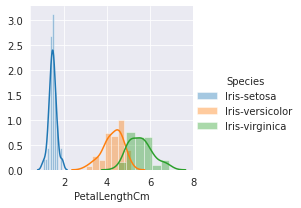

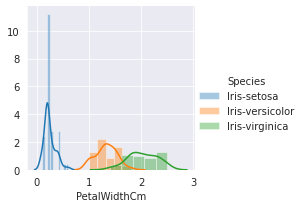

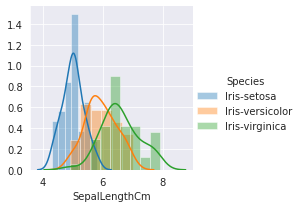

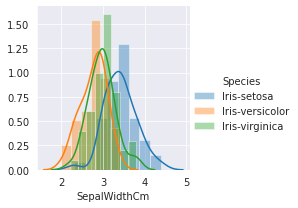

In [37]:
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"PetalLengthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"PetalWidthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalLengthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalWidthCm").add_legend();


From above plot, we see that on the basis of petal width and length, setosa is separable while the other two are overlapping, whereas, on the basis of sepal width and length, all three are overlapping

<Figure size 360x360 with 0 Axes>

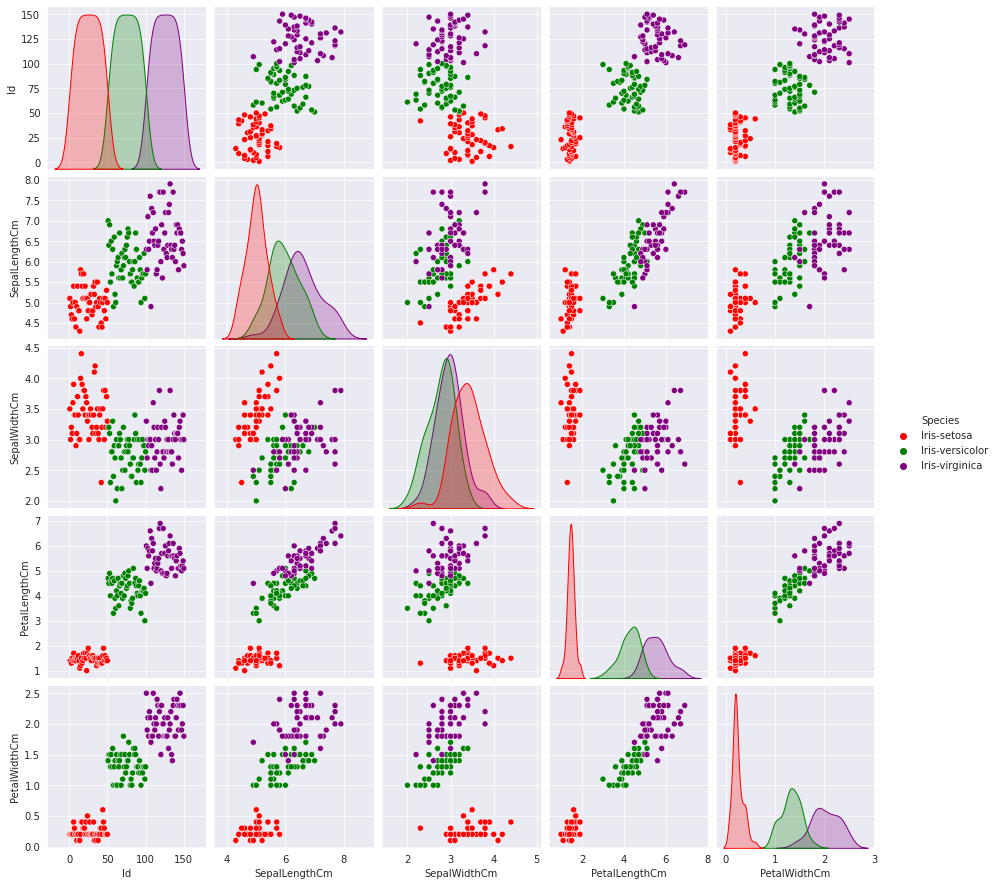

In [38]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.pairplot(data=iris, hue='Species', palette=['red','green','purple'])


From above plot, the following inferences can be made:

Considering sepal length & sepal width, setosa is easily seperable but versicolor & virginica have some overlap.
Considering petal length & petal width, all 3 the species are quite seperable.

##Modelling with K-Means Clustering

In [17]:
x = iris.drop(['Species'],axis=1)
y = iris.Species

##Applying K-Means Clustering

In [39]:
from sklearn.cluster import KMeans
wcss = []

feature = iris.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

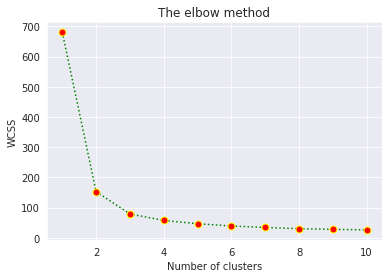

In [45]:
plt.plot(range(1, 11), wcss,'o:g', ms = 7, mec = 'yellow', mfc = 'red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The above method is the implementation of "The Elbow Method". The elbow method shows us to pick optimum no of clusters for classification. Also, the plot clearly shows why it is called "The elbow method".

The optimum clusters is where the elbow curve happens. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. In above graph, clusters = k =3.

Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [23]:

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [24]:

centroids=kmeans.cluster_centers_
centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [25]:
iris1=iris.copy()
iris1["Species"]=iris1["Species"].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}).astype(int)
iris1.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


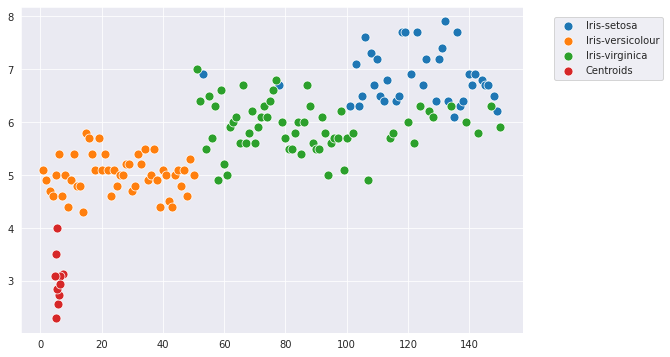

In [41]:
plt.figure(figsize = (9,6))
# Plotting the clusters
sns.scatterplot(x=feature[y_kmeans == 0, 0], y=feature[y_kmeans == 0, 1], s = 80, label = 'Iris-setosa')
sns.scatterplot(x=feature[y_kmeans == 1, 0], y=feature[y_kmeans == 1, 1], s = 80, label = 'Iris-versicolour')
sns.scatterplot(x=feature[y_kmeans == 2, 0], y=feature[y_kmeans == 2, 1], s = 80, label = 'Iris-virginica')

#Plotting the centroids of the clusters
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:,1], s = 80, label = 'Centroids')

plt.legend(bbox_to_anchor = (1.3,1), borderaxespad = 1)


Using Matplotib to plot 3D scatter Plot:

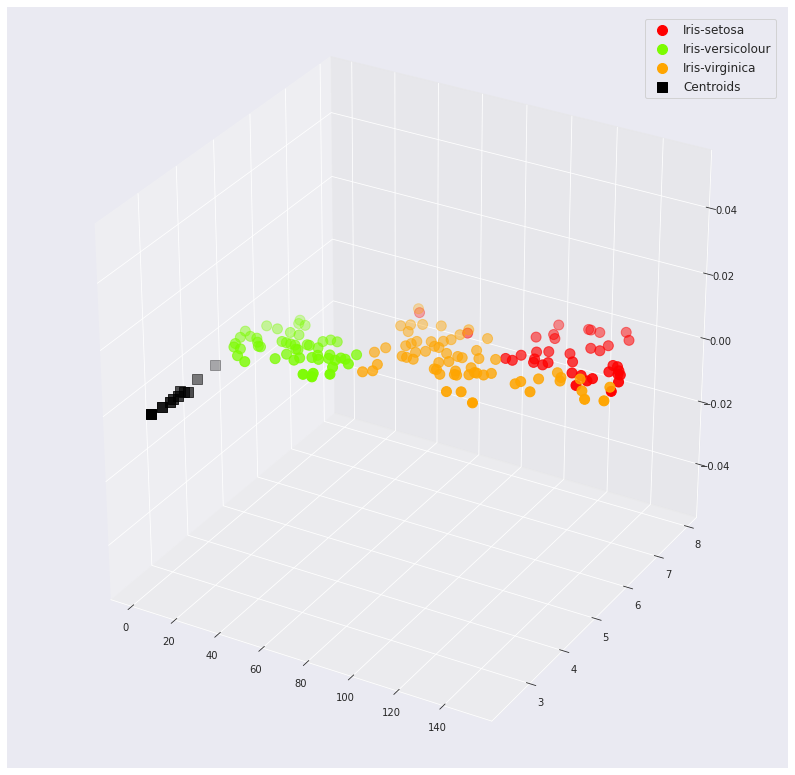

In [42]:

fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x=feature[y_kmeans == 0, 0], y=feature[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x=feature[y_kmeans == 1, 0], y=feature[y_kmeans == 1, 1], s = 100, c = 'lawngreen',label = 'Iris-versicolour')
plt.scatter(x=feature[y_kmeans == 2, 0], y=feature[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')

#Plotting the centroids
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:,1], s = 100, marker = "s", c = 'black', 
            label = 'Centroids')

#displaying legends and plots
plt.legend(fontsize='large', borderaxespad = 1)
plt.show()